# Challenges and Questions: final project phase
___

In [ ]:
import sys
import os

milestone_2_path = os.path.abspath("../milestone 2")
sys.path.append(milestone_2_path)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import import_preprocess, baseline_models
from importlib import reload
reload(import_preprocess)
reload(baseline_models)

from import_preprocess import ImportPreprocess

from bert_models import BERTModel

d:\Natural Language Processing\Project new\NLP_24W_VSHJ\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Initially, we'll identify which model performs best for our task (assumption: `HateBERT`). To do this, we'll start with the base scenario: a balanced or unbalanced dataset with the initial labels. Maybe better just balanced????????????

Once we determine the best model, we'll retrain it using various scenarios, including both balanced and unbalanced datasets, along with 3 distinct types of label aggregation: `original` (provided by the dataset creators), `majority voting` (applied to the labels from 3 annotators) and `at least one sexist` (where a label is "sexist" if at least 1 annotator assigned it as such). These combinations of dataset type and aggregation method yield 6 distinct configurations for model training.

In [2]:
import_preprocess = ImportPreprocess()
import_preprocess.import_train_val_test()
import_preprocess.create_balanced_dataset()

X_train, y_train, S_train, y_train_multi = import_preprocess.X_train, import_preprocess.y_train, import_preprocess.S_train, import_preprocess.y_train_multi
X_val, y_val, S_val, y_val_multi = import_preprocess.X_val, import_preprocess.y_val, import_preprocess.S_val, import_preprocess.y_val_multi
X_test, y_test, S_test, y_test_multi = import_preprocess.X_test, import_preprocess.y_test, import_preprocess.S_test, import_preprocess.y_test_multi
X_balanced, y_balanced = import_preprocess.X_train_balanced, import_preprocess.y_train_balanced

# different aggregation methods
y_train_mv, y_train_balanced_mv, y_val_mv, y_test_mv = import_preprocess.apply_aggregation(aggregation_type='majority voting')
y_train_alos, y_train_balanced_alos, y_val_alos, y_test_alos = import_preprocess.apply_aggregation(aggregation_type='at least one sexist')

print("Number of training samples:", len(X_train)) 
print("Number of validation samples:", len(X_val))
print("Number of test samples:", len(X_test)) 
print("Number of balanced samples:", len(X_balanced))

Number of training samples: 14000
Number of validation samples: 2000
Number of test samples: 4000
Number of balanced samples: 10000


# BERT-based models

In [ ]:
model = BERTModel("HateBERT")
model.train(X_train[:30], y_train[:30], X_val[:10], y_val[:10])

Loading pretrained model and tokenizer...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at GroNLP/hateBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
d:\Natural Language Processing\Project new\NLP_24W_VSHJ\venv\lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Pretrained weights loaded successfully.
Training started.
Epoch 1/3, Cross-entropy Loss: 6.4880
Validation Accuracy: 0.6900
Epoch 2/3, Cross-entropy Loss: 5.7621
Validation Accuracy: 0.6900
Epoch 3/3, Cross-entropy Loss: 3.8499
Validation Accuracy: 0.7100


########################################

Metrics for training
accuracy: 0.9300
balanced accuracy: 0.8918
precision: 1.0000
recall: 0.7835

########################################

Metrics for validation
accuracy: 0.7100
balanced accuracy: 0.5323
precision: 1.0000
recall: 0.0645

########################################



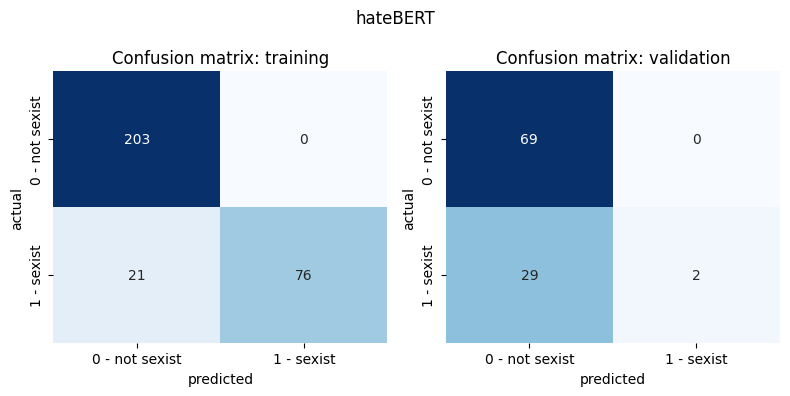

In [ ]:
res = model.evaluate({"training": X_train[:300], "validation": X_val[:100]}, [y_train[:300], y_val[:100]], model_name="hateBERT")

# Autoregressive models: LLAMA